In [1]:
%load_ext autoreload
%autoreload 2

import sys, os

sys.path.append(os.getcwd() + "/scripts/")
sys.path.append(os.getcwd())

from run_experiment import (generate_explanations, calculate_ensembles, get_filenames,
                            print_image, calculate_statistics, compute_score_table)
from statistics_record import AttrbutionsRecord
from sklearn.neural_network import BernoulliRBM

In [2]:
title = "mnist_test"
dataset = "mnist"
ensemble_name = "mnist_notebook_test"

In [3]:
generate_explanations(title, dataset, ["DeepLift", "IntegratedGradient", "Saliency"], 10)


 20%|██        | 2/10 [00:00<00:00, 12.55it/s]

simple_model loaded


100%|██████████| 10/10 [00:00<00:00, 12.65it/s]

100%|██████████| 10/10 [00:00<00:00, 11.54it/s]

Original image


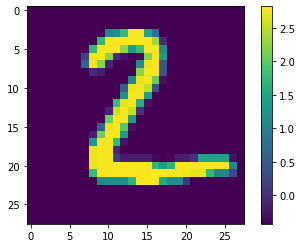

DeepLift


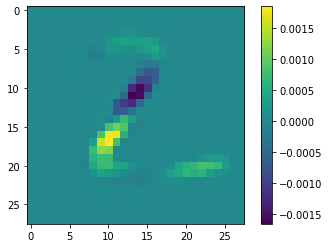

IntegratedGradient


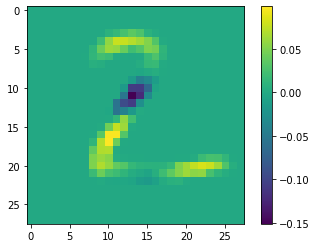

Saliency


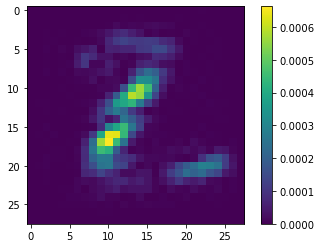

In [4]:
files = get_filenames(title, "individual_methods")
ar1 = AttrbutionsRecord.load(title, "individual_attribution", files[0])

image_id = 1
print_image(ar1.images[image_id].cpu().numpy(), "Original image")

for i, attr in enumerate(ar1.attributions[image_id]):
    print_image(attr, ar1.methods[i])

In [5]:
task1 = dict({
    "title": "mean",
    "technique": "mean",
    "individual_methods": [1, 1, 1],
    "nr_noise": 0,
    "rbm": None,
})

task2 = dict({
    "title": "rbm",
    "technique": "rbm",
    "individual_methods": [1, 1, 1],
    "nr_noise": 0,
    "rbm": [BernoulliRBM(n_components=1, batch_size=10, learning_rate=0.01, n_iter=100)]
})

calculate_ensembles(title, ensemble_name, [task1, task2], True)

100%|██████████| 3/3 [00:03<00:00,  1.16s/it]


mean


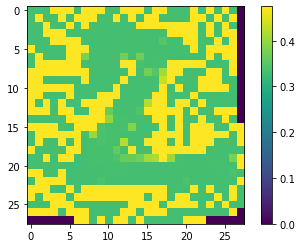

rbm


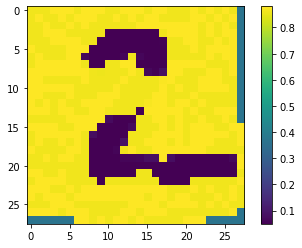

rbm flipped


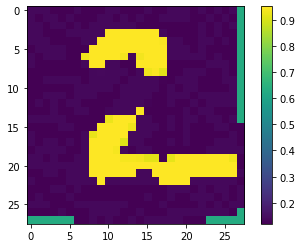

In [6]:
files = get_filenames(title, ensemble_name)
ar1 = AttrbutionsRecord.load(title, ensemble_name, files[0])

image_id = 1

for i, (attr, ensemble) in enumerate(ar1.get_ensemble_double_rbm(image_id)):
    print_image(attr, ensemble)

In [7]:
calculate_statistics(title, ensemble_name, True, True, True)

  0%|          | 0/3 [00:00<?, ?it/s]

simple_model loaded


100%|██████████| 3/3 [00:31<00:00, 10.54s/it]


In [8]:
df = compute_score_table(title, ensemble_name)
df

100%|██████████| 3/3 [00:00<00:00, 1636.06it/s]


,Method,Insert Mean,Insert Std.,Delete Mean,Delete Std.,IROF Mean,IROF Std.
0,DeepLift,0.991820,0.009035,0.057142,0.027278,0.108389,0.024245
1,IntegratedGradient,0.991579,0.005278,0.063159,0.017317,0.106337,0.029999
2,Saliency,0.979997,0.017755,0.186172,0.070759,0.120085,0.028276
3,mean,0.561594,0.051634,0.531968,0.048560,0.496216,0.039210
4,rbm,0.975359,0.009258,0.134065,0.046632,0.118130,0.037118
